# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones. En la empresa nos interesa enteder el proceso del análisis para tomar deciciones adecuadas. 


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# Importar librerías
import pandas as pd# Importar librerías
import matplotlib.pyplot as plt

In [2]:
# Leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv')
products = pd.read_csv('/datasets/products.csv')
aisles = pd.read_csv('/datasets/aisles.csv')
departments = pd.read_csv('/datasets/departments.csv')
order_products = pd.read_csv('/datasets/order_products.csv')


In [3]:
# Mostrar información del DataFrame orders
print("Información del DataFrame orders:")
orders.info()

Información del DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB


In [4]:
# Mostrar información del DataFrame products
print("\nInformación del DataFrame products:")
products.info()


Información del DataFrame products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB


In [5]:
# Mostrar información del DataFrame aisles
print("\nInformación del DataFrame aisles:")
aisles.info()


Información del DataFrame aisles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


In [6]:
# Mostrar información del DataFrame departments
print("\nInformación del DataFrame departments:")
departments.info()


Información del DataFrame departments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes


In [7]:
# Mostrar información del DataFrame order_products
print("\nInformación del DataFrame order_products:")
order_products.info()


Información del DataFrame order_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Dtype 
---  ------                                           ----- 
 0   order_id;product_id;add_to_cart_order;reordered  object
dtypes: object(1)
memory usage: 34.7+ MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

orders DataFrame:
Contiene información sobre los pedidos realizados en la aplicación Instacart.
Columnas relevantes incluyen: order_id, user_id, order_number, order_dow, order_hour_of_day, y days_since_prior_order.
Necesitaremos verificar si hay valores nulos en days_since_prior_order.

products DataFrame:
Contiene información sobre los productos disponibles en la aplicación Instacart.
Columnas relevantes incluyen: product_id, product_name, aisle_id, y department_id.

aisles DataFrame:
Contiene información sobre los pasillos de víveres.
Columnas relevantes incluyen: aisle_id y aisle.

departments DataFrame:
Contiene información sobre los departamentos de víveres.
Columnas relevantes incluyen: department_id y department.

order_products DataFrame:
Contiene información sobre los productos pedidos en cada pedido.
Columnas relevantes incluyen: order_id, product_id, add_to_cart_order, y reordered.

A partir de esta información, podremos realizar el preprocesamiento de datos y el análisis exploratorio de datos, asegurándonos de manejar adecuadamente los datos faltantes y las relaciones entre las diferentes tablas.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Plan de solución:

1. Verificar y corregir los tipos de datos:
    Revisar los tipos de datos de todas las columnas.
    Asegurarnos de que las columnas de ID sean números enteros (int).

2. Identificar y completar los valores ausentes:
    Verificar si hay valores ausentes en las columnas.
    Decidir cómo tratar los valores ausentes en función de la naturaleza de los datos.

3. Identificar y eliminar los valores duplicados:
    Verificar si hay filas duplicadas en los DataFrames.
    Eliminar las filas duplicadas si las encontramos.

4. Explicación de valores ausentes y duplicados:
    Describir los tipos de valores ausentes y duplicados encontrados.
    Explicar cómo se completaron o eliminaron y la razón de los métodos utilizados.
    Considerar por qué estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
# Verificar duplicados en el DataFrame 'orders'
duplicated_orders = orders[orders.duplicated()]

# Contar el número de duplicados
num_duplicated_orders = len(duplicated_orders)

# Mostrar resultados
print(f"Número de pedidos duplicados: {num_duplicated_orders}")

# Si hay duplicados, mostrar algunos ejemplos
if num_duplicated_orders > 0:
    print("Ejemplos de pedidos duplicados:")
    print(duplicated_orders.head())

Número de pedidos duplicados: 15
Ejemplos de pedidos duplicados:
       order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
145574                            794638;50898;24;3;2;2.0                              
223105                         2160484;107525;16;3;2;30.0                              
230807                         1918001;188546;14;3;2;16.0                              
266232                              1782114;106752;1;3;2;                              
273805                          1112182;202304;84;3;2;6.0                              


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Inicialmente, se encontraron filas duplicadas en el DataFrame instacart_orders.
Al revisar las filas duplicadas, se observó que podrían compartir patrones comunes.

In [9]:
# Basándote en tus hallazgos,
# Filtrar los pedidos realizados a las 2 de la mañana del día miércoles 

# Leer conjuntos de datos en los DataFrames con el delimitador correcto
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
products = pd.read_csv('/datasets/products.csv', delimiter=';')
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')


# Filtrar los pedidos realizados a las 2 de la mañana (hora 2) los miércoles (día 3)
wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

# Mostrar el resultado de los pedidos realizados a las 2 de la mañana los miércoles
print(f"Pedidos realizados a las 2 de la mañana el día miércoles: {len(wednesday_2am_orders)}")
print(wednesday_2am_orders.head())


Pedidos realizados a las 2 de la mañana el día miércoles: 121
       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


¿Qué sugiere este resultado? 
El resultado sugiere que hay un total de 121 pedidos realizados a las 2 de la mañana los días miércoles en el conjunto de datos proporcionado. Esto indica que existe una actividad notable de pedidos en ese horario y día específico.

Patrones de Consumo Nocturno:

Los datos muestran que hay usuarios que hacen pedidos a altas horas de la noche. Podríamos investigar si estos usuarios tienen un patrón específico de comportamiento, como trabajar en turnos nocturnos o tener hábitos de compra nocturnos.

Segmentación de Usuarios:

Identificar si ciertos usuarios realizan pedidos recurrentes a esta hora podría ayudar a segmentar a los clientes y ofrecer promociones o servicios especiales para este grupo.

Logística y Operaciones:

Para el equipo logístico, estos pedidos pueden indicar la necesidad de recursos adicionales en horas no convencionales. Podríamos analizar si hay un aumento en los costos operativos o en la eficiencia del servicio durante estas horas.

Comparación con Otros Horarios:

Comparar la frecuencia de pedidos en otros horarios y días de la semana para ver si las 2 de la mañana los miércoles es un punto fuera de lo común o si hay otros patrones similares.

Análisis de Satisfacción del Cliente:

Evaluar la satisfacción de los clientes que realizan pedidos a esta hora para entender si están satisfechos con el servicio nocturno y si hay áreas de mejora.

Investigación de Productos Comprados:

Examinar los productos comprados en estos pedidos para ver si hay tendencias en el tipo de productos que los usuarios tienden a comprar a esa hora.

In [10]:
# Elimina los pedidos duplicados
orders_cleaned = orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
# Verificar que los duplicados han sido eliminados
num_duplicated_orders_after = orders_cleaned[orders_cleaned.duplicated()].shape[0]
print(f"Número de pedidos duplicados después de la limpieza: {num_duplicated_orders_after}")

Número de pedidos duplicados después de la limpieza: 0


In [12]:
# Vuelve a verificar si hay IDs duplicados de pedidos
duplicated_order_ids = orders_cleaned[orders_cleaned['order_id'].duplicated()]

# Contar el número de IDs duplicados
num_duplicated_order_ids = len(duplicated_order_ids)

# Mostrar resultados
print(f"Número de IDs de pedidos duplicados después de la limpieza: {num_duplicated_order_ids}")

# Si hay IDs duplicados, mostrar algunos ejemplos
if num_duplicated_order_ids > 0:
    print("Ejemplos de IDs de pedidos duplicados después de la limpieza:")
    print(duplicated_order_ids.head())

Número de IDs de pedidos duplicados después de la limpieza: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos:

Hallazgos y Acciones Realizadas:

1. Detección de Duplicados Inicial:

Hallazgo: Se encontraron 15 pedidos duplicados en el DataFrame orders.
Acción: Se mostraron algunos ejemplos de estos pedidos duplicados para verificar la existencia y naturaleza de los duplicados.

2. Filtrado de Pedidos Específicos:

Hallazgo: Se identificaron 121 pedidos realizados a las 2 de la mañana los días miércoles.
Acción: Se filtraron y mostraron algunos ejemplos de estos pedidos para analizar patrones específicos de comportamiento de los usuarios en ese horario.

3. Eliminación de Pedidos Duplicados:

Acción: Se utilizó el método drop_duplicates() para eliminar los pedidos duplicados del DataFrame orders. Esto resultó en un DataFrame limpio sin duplicados.

4. Verificación de Duplicados Después de la Limpieza:

Hallazgo: Después de la limpieza, se volvió a verificar la presencia de duplicados basados en el ID del pedido.
Acción: Se confirmó que no quedaban pedidos duplicados en el DataFrame orders_cleaned.

Resumen del Proceso: 

Carga de Datos: Se cargaron los datos desde archivos CSV en DataFrames utilizando pandas.

Verificación Inicial: Se identificaron y contaron los pedidos duplicados en el DataFrame original.

Muestreo de Duplicados: Se mostraron ejemplos de los pedidos duplicados detectados.

Filtrado Específico: Se filtraron los pedidos realizados a una hora y día específicos (2 de la mañana, miércoles) para análisis adicionales.

Limpieza de Datos: Se eliminaron los duplicados del DataFrame orders.

Verificación Posterior: Se volvió a verificar la presencia de duplicados, asegurando que el DataFrame orders_cleaned estuviera libre de duplicados.

Este proceso asegura que los datos sean consistentes y estén preparados para análisis adicionales sin la interferencia de duplicados, proporcionando una base sólida para cualquier análisis futuro de patrones de compra o comportamiento del cliente.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
# Verificar filas totalmente duplicadas en el DataFrame 'products'
duplicated_products = products[products.duplicated()]

# Contar el número de filas duplicadas
num_duplicated_products = len(duplicated_products)

# Mostrar resultados
print(f"Número de filas totalmente duplicadas en 'products': {num_duplicated_products}")

# Si hay duplicados, mostrar algunos ejemplos
if num_duplicated_products > 0:
    print("Ejemplos de filas totalmente duplicadas en 'products':")
    print(duplicated_products.head())

Número de filas totalmente duplicadas en 'products': 0


In [14]:
# Verifica si hay IDs duplicadas de productos
# Verificar si hay IDs duplicadas de productos
duplicated_product_ids = products[products['product_id'].duplicated()]

# Contar el número de IDs duplicadas
num_duplicated_product_ids = len(duplicated_product_ids)

# Mostrar resultados
print(f"Número de IDs duplicadas de productos: {num_duplicated_product_ids}")

# Si hay IDs duplicadas, mostrar algunos ejemplos
if num_duplicated_product_ids > 0:
    print("Ejemplos de IDs duplicadas de productos:")
    print(duplicated_product_ids.head())

Número de IDs duplicadas de productos: 0


In [15]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
# Revisar si hay nombres duplicados de productos (convertir los nombres a letras mayúsculas para compararlos mejor)
products['product_name_upper'] = products['product_name'].str.upper()
duplicated_product_names = products[products['product_name_upper'].duplicated()]

# Contar el número de nombres duplicados
num_duplicated_product_names = len(duplicated_product_names)

# Mostrar resultados
print(f"Número de nombres duplicados de productos: {num_duplicated_product_names}")

# Si hay nombres duplicados, mostrar algunos ejemplos
if num_duplicated_product_names > 0:
    print("Ejemplos de nombres duplicados de productos:")
    print(duplicated_product_names[['product_id', 'product_name']].head())

Número de nombres duplicados de productos: 1361
Ejemplos de nombres duplicados de productos:
     product_id product_name
71           72          NaN
109         110          NaN
296         297          NaN
416         417          NaN
436         437          NaN


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
# Revisar si hay nombres duplicados de productos no faltantes (nombre no nulo y no vacío)
products_not_missing_names = products[products['product_name'].notnull() & (products['product_name'] != '')].copy()
products_not_missing_names.loc[:, 'product_name_upper'] = products_not_missing_names['product_name'].str.upper()
duplicated_not_missing_product_names = products_not_missing_names[products_not_missing_names['product_name_upper'].duplicated()]

# Contar el número de nombres duplicados de productos no faltantes
num_duplicated_not_missing_product_names = len(duplicated_not_missing_product_names)

# Mostrar resultados
print(f"Número de nombres duplicados de productos no faltantes: {num_duplicated_not_missing_product_names}")

# Si hay nombres duplicados de productos no faltantes, mostrar algunos ejemplos
if num_duplicated_not_missing_product_names > 0:
    print("Ejemplos de nombres duplicados de productos no faltantes:")
    print(duplicated_not_missing_product_names[['product_id', 'product_name']].head())

Número de nombres duplicados de productos no faltantes: 104
Ejemplos de nombres duplicados de productos no faltantes:
      product_id                      product_name
2058        2059                   Biotin 1000 Mcg
5455        5456  Green Tea With Ginseng and Honey
5558        5559            Cream Of Mushroom Soup
7558        7559         Cinnamon Rolls with Icing
9037        9038            American Cheese slices


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. Filas Totalmente Duplicadas:

Hallazgo: No se encontraron filas totalmente duplicadas en el DataFrame products.
Interpretación: Esto indica que cada fila en el DataFrame es única en términos de todos los atributos combinados.

2. IDs Duplicadas de Productos:

Hallazgo: No se encontraron IDs duplicadas en la columna product_id.
Interpretación: Cada producto tiene un ID único, lo cual es crucial para mantener la integridad de los datos y asegurar que cada producto pueda ser identificado de manera unívoca.

3. Nombres Duplicados de Productos:

Hallazgo: Se encontraron 1361 nombres duplicados de productos.
Interpretación: Esto sugiere que hay productos diferentes que comparten el mismo nombre o que hay errores en los datos donde el mismo producto se ha ingresado múltiples veces con ligeras variaciones en otros atributos.

4. Nombres Duplicados de Productos No Faltantes:

Hallazgo: De los nombres de productos no nulos y no vacíos, se encontraron 104 nombres duplicados.
Interpretación: Entre los productos con nombres válidos, sigue habiendo un número significativo de duplicados. Esto podría deberse a productos con variantes menores pero con el mismo nombre o a posibles errores de entrada de datos.

Conclusión:
El análisis del DataFrame products reveló que, aunque no hay duplicados en términos de filas completas o IDs de productos, existe una cantidad considerable de nombres duplicados. Esto puede afectar la calidad del análisis y la interpretación de los datos, sugiriendo la necesidad de una revisión y posible normalización de los nombres de productos para asegurar que cada producto sea único y correctamente identificado.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
# Verificar si hay filas totalmente duplicadas en el DataFrame 'departments'
duplicated_departments = departments[departments.duplicated()]

# Contar el número de filas duplicadas
num_duplicated_departments = len(duplicated_departments)

# Mostrar resultados
print(f"Número de filas totalmente duplicadas en 'departments': {num_duplicated_departments}")

# Si hay duplicados, mostrar algunos ejemplos
if num_duplicated_departments > 0:
    print("Ejemplos de filas totalmente duplicadas en 'departments':")
    print(duplicated_departments.head())

Número de filas totalmente duplicadas en 'departments': 0


In [18]:
# Revisa si hay IDs duplicadas de productos
# Verificar si hay IDs duplicadas de departamentos
duplicated_department_ids = departments[departments['department_id'].duplicated()]

# Contar el número de IDs duplicadas
num_duplicated_department_ids = len(duplicated_department_ids)

# Mostrar resultados
print(f"Número de IDs duplicadas de departamentos: {num_duplicated_department_ids}")

# Si hay IDs duplicadas, mostrar algunos ejemplos
if num_duplicated_department_ids > 0:
    print("Ejemplos de IDs duplicadas de departamentos:")
    print(duplicated_department_ids.head())

Número de IDs duplicadas de departamentos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. Filas Totalmente Duplicadas:

Hallazgo: No se encontraron filas totalmente duplicadas en el DataFrame departments.
Interpretación: Cada fila en el DataFrame es única en términos de todos los atributos combinados, lo que indica que no hay duplicación completa de registros.

2. IDs Duplicadas de Departamentos:

Hallazgo: No se encontraron IDs duplicadas en la columna department_id.
Interpretación: Cada departamento tiene un ID único, asegurando que cada departamento pueda ser identificado de manera unívoca y evitando cualquier posible confusión o error en la identificación de departamentos.

Conclusión:
El análisis del DataFrame departments reveló que no hay duplicados, ni en términos de filas completas ni en los IDs de departamentos. Esto indica que los datos del DataFrame departments son consistentes y únicos, proporcionando una base sólida y confiable para cualquier análisis adicional o procesamiento posterior.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
# Verificar si hay filas totalmente duplicadas en el DataFrame 'aisles'
duplicated_aisles = aisles[aisles.duplicated()]

# Contar el número de filas duplicadas
num_duplicated_aisles = len(duplicated_aisles)

# Mostrar resultados
print(f"Número de filas totalmente duplicadas en 'aisles': {num_duplicated_aisles}")

# Si hay duplicados, mostrar algunos ejemplos
if num_duplicated_aisles > 0:
    print("Ejemplos de filas totalmente duplicadas en 'aisles':")
    print(duplicated_aisles.head())

Número de filas totalmente duplicadas en 'aisles': 0


In [20]:
# Revisa si hay IDs duplicadas de productos
# Verificar si hay IDs duplicadas de pasillos
duplicated_aisle_ids = aisles[aisles['aisle_id'].duplicated()]

# Contar el número de IDs duplicadas
num_duplicated_aisle_ids = len(duplicated_aisle_ids)

# Mostrar resultados
print(f"Número de IDs duplicadas de pasillos: {num_duplicated_aisle_ids}")

# Si hay IDs duplicadas, mostrar algunos ejemplos
if num_duplicated_aisle_ids > 0:
    print("Ejemplos de IDs duplicadas de pasillos:")
    print(duplicated_aisle_ids.head())

Número de IDs duplicadas de pasillos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. Filas Totalmente Duplicadas:
Hallazgo: No se encontraron filas totalmente duplicadas en el DataFrame aisles.
Interpretación: Cada fila en el DataFrame es única en términos de todos los atributos combinados, lo que indica que no hay duplicación completa de registros.

2. IDs Duplicadas de Pasillos:
Hallazgo: No se encontraron IDs duplicadas en la columna aisle_id.
Interpretación: Cada pasillo tiene un ID único, asegurando que cada pasillo pueda ser identificado de manera unívoca y evitando cualquier posible confusión o error en la identificación de pasillos.

Conclusión:
El análisis del DataFrame aisles reveló que no hay duplicados, ni en términos de filas completas ni en los IDs de pasillos. Esto indica que los datos del DataFrame aisles son consistentes y únicos, proporcionando una base sólida y confiable para cualquier análisis adicional o procesamiento posterior.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
# Verificar si hay filas totalmente duplicadas en el DataFrame 'order_products'
duplicated_order_products = order_products[order_products.duplicated()]

# Contar el número de filas duplicadas
num_duplicated_order_products = len(duplicated_order_products)

# Mostrar resultados
print(f"Número de filas totalmente duplicadas en 'order_products': {num_duplicated_order_products}")

# Si hay duplicados, mostrar algunos ejemplos
if num_duplicated_order_products > 0:
    print("Ejemplos de filas totalmente duplicadas en 'order_products':")
    print(duplicated_order_products.head())

Número de filas totalmente duplicadas en 'order_products': 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
# Verificar si hay duplicados basados en combinaciones de 'order_id' y 'product_id'
duplicated_combinations = order_products[order_products.duplicated(subset=['order_id', 'product_id'])]

# Contar el número de duplicados basados en combinaciones de 'order_id' y 'product_id'
num_duplicated_combinations = len(duplicated_combinations)

# Mostrar resultados
print(f"Número de duplicados basados en combinaciones de 'order_id' y 'product_id': {num_duplicated_combinations}")

# Si hay duplicados basados en combinaciones, mostrar algunos ejemplos
if num_duplicated_combinations > 0:
    print("Ejemplos de duplicados basados en combinaciones de 'order_id' y 'product_id':")
    print(duplicated_combinations.head())

Número de duplicados basados en combinaciones de 'order_id' y 'product_id': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. Filas Totalmente Duplicadas:

Hallazgo: No se encontraron filas totalmente duplicadas en el DataFrame order_products.
Interpretación: Cada fila en el DataFrame es única en términos de todos los atributos combinados, lo que indica que no hay duplicación completa de registros.

2. Duplicados Basados en Combinaciones de order_id y product_id:

Hallazgo: No se encontraron duplicados basados en combinaciones de order_id y product_id.
Interpretación: No hay registros donde el mismo producto aparezca más de una vez en el mismo pedido. Esto sugiere que cada combinación de pedido y producto es única, lo cual es crucial para mantener la integridad de los datos y asegurar que cada combinación de pedido-producto sea registrada correctamente.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
# Encontrar los valores ausentes en la columna 'product_name'
missing_product_names = products[products['product_name'].isnull() | (products['product_name'] == '')]

# Contar el número de valores ausentes
num_missing_product_names = len(missing_product_names)

# Mostrar resultados
print(f"Número de valores ausentes en 'product_name': {num_missing_product_names}")

# Si hay valores ausentes, mostrar algunos ejemplos
if num_missing_product_names > 0:
    print("Ejemplos de valores ausentes en 'product_name':")
    print(missing_product_names.head())

Número de valores ausentes en 'product_name': 1258
Ejemplos de valores ausentes en 'product_name':
     product_id product_name  aisle_id  department_id product_name_upper
37           38          NaN       100             21                NaN
71           72          NaN       100             21                NaN
109         110          NaN       100             21                NaN
296         297          NaN       100             21                NaN
416         417          NaN       100             21                NaN


Describe brevemente cuáles son tus hallazgos. Hay 1258 valores ausentes los cuales parecen corresponder al pasillo 100 y al departamento 21, segun el muestreo de los datos. 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Encontrar los valores ausentes en la columna 'product_name'
missing_product_names = products[products['product_name'].isnull() | (products['product_name'] == '')]

# Verificar si todos los nombres de productos ausentes están relacionados con el pasillo con ID 100
unique_aisles_with_missing_names = missing_product_names['aisle_id'].unique()

# Mostrar resultados
print("IDs de pasillos relacionados con nombres de productos ausentes:", unique_aisles_with_missing_names)

# Verificar si todos los nombres de productos ausentes están en el pasillo con ID 100
all_missing_in_aisle_100 = len(unique_aisles_with_missing_names) == 1 and unique_aisles_with_missing_names[0] == 100

print(f"¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? {all_missing_in_aisle_100}")

IDs de pasillos relacionados con nombres de productos ausentes: [100]
¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100? True


Describe brevemente cuáles son tus hallazgos.
El análisis del DataFrame products reveló que todos los productos con nombres ausentes están relacionados con el aisle_id 100. Esto sugiere que hay un problema específico de captura de datos o mantenimiento de registros para este pasillo.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Encontrar los valores ausentes en la columna 'product_name'
missing_product_names = products[products['product_name'].isnull() | (products['product_name'] == '')]

# Verificar si todos los nombres de productos ausentes están relacionados con el departamento con ID 21
unique_departments_with_missing_names = missing_product_names['department_id'].unique()

# Mostrar resultados
print("IDs de departamentos relacionados con nombres de productos ausentes:", unique_departments_with_missing_names)

# Verificar si todos los nombres de productos ausentes están en el departamento con ID 21
all_missing_in_department_21 = len(unique_departments_with_missing_names) == 1 and unique_departments_with_missing_names[0] == 21

print(f"¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? {all_missing_in_department_21}")

IDs de departamentos relacionados con nombres de productos ausentes: [21]
¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21? True


Describe brevemente cuáles son tus hallazgos.
El análisis del DataFrame products reveló que todos los productos con nombres ausentes están relacionados tanto con el aisle_id 100 como con el department_id 21. Esto sugiere que hay un problema específico de captura de datos o mantenimiento de registros para este pasillo y departamento.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
# Leer los conjuntos de datos en los DataFrames
products = pd.read_csv('/datasets/products.csv', delimiter=';')
aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
departments = pd.read_csv('/datasets/departments.csv', delimiter=';')

# Filtrar los productos con aisle_id 100 y department_id 21
filtered_products = products[(products['aisle_id'] == 100) & (products['department_id'] == 21)]

# Unir los datos de products con aisles y departments para obtener más información
merged_data = filtered_products.merge(aisles, on='aisle_id', how='left').merge(departments, on='department_id', how='left')

# Mostrar los resultados
print("Datos de productos del pasillo con ID 100 y el departamento con ID 21:")
print(merged_data.head())

Datos de productos del pasillo con ID 100 y el departamento con ID 21:
   product_id product_name  aisle_id  department_id    aisle department
0          38          NaN       100             21  missing    missing
1          72          NaN       100             21  missing    missing
2         110          NaN       100             21  missing    missing
3         297          NaN       100             21  missing    missing
4         417          NaN       100             21  missing    missing


Describe brevemente cuáles son tus hallazgos.

El análisis detallado ha revelado problemas significativos de datos faltantes en el pasillo con aisle_id 100 y el departamento con department_id 21. Estos problemas deben abordarse para mejorar la integridad y la calidad de los datos, lo cual es crucial para realizar análisis precisos y tomar decisiones informadas basadas en estos datos.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
# Encontrar y completar los valores ausentes en la columna 'product_name' con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)
products['product_name'].replace('', 'Unknown', inplace=True)

# Verificar que se han completado los valores ausentes
missing_product_names_after = products[products['product_name'].isnull() | (products['product_name'] == 'Unknown')]

# Mostrar algunos resultados
print("Algunos ejemplos de productos con 'product_name' completado:")
print(missing_product_names_after.head())

Algunos ejemplos de productos con 'product_name' completado:
     product_id product_name  aisle_id  department_id
37           38      Unknown       100             21
71           72      Unknown       100             21
109         110      Unknown       100             21
296         297      Unknown       100             21
416         417      Unknown       100             21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Conclusión 

Consistencia e Integridad de los Datos: Al completar los valores ausentes con 'Unknown', se ha mejorado la consistencia y la integridad del DataFrame products. Esto permite realizar análisis futuros sin la interferencia de valores nulos o vacíos en la columna product_name.
Reconocimiento del Problema: Aunque se ha completado el campo product_name, es importante reconocer que la presencia de 'Unknown' indica que estos productos necesitan una revisión adicional para identificar sus nombres correctos.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
# Encontrar valores ausentes en el DataFrame 'orders'
missing_values = orders.isnull().sum()

# Mostrar los resultados
print("Número de valores ausentes en cada columna de 'orders':")
print(missing_values)

# Filtrar las filas con valores ausentes
rows_with_missing_values = orders[orders.isnull().any(axis=1)]

# Mostrar algunas filas con valores ausentes
print("Algunos ejemplos de filas con valores ausentes en 'orders':")
print(rows_with_missing_values.head())

Número de valores ausentes en cada columna de 'orders':
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64
Algunos ejemplos de filas con valores ausentes en 'orders':
     order_id  user_id  order_number  order_dow  order_hour_of_day  \
28     133707   182261             1          3                 10   
96     787445    25685             1          6                 18   
100    294410   111449             1          0                 19   
103   2869915   123958             1          4                 16   
104   2521921    42286             1          3                 18   

     days_since_prior_order  
28                      NaN  
96                      NaN  
100                     NaN  
103                     NaN  
104                     NaN  


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# Filtrar las filas con valores ausentes
rows_with_missing_values = orders[orders.isnull().any(axis=1)]

# Verificar si hay valores ausentes que no sean el primer pedido del cliente
missing_not_first_order = rows_with_missing_values[rows_with_missing_values['order_number'] > 1]

# Contar el número de casos
num_missing_not_first_order = len(missing_not_first_order)

# Mostrar resultados
print(f"¿Hay valores ausentes que no sean el primer pedido del cliente? {'Sí' if num_missing_not_first_order > 0 else 'No'}")
print(f"Número de casos: {num_missing_not_first_order}")

# Si hay casos, mostrar algunos ejemplos
if num_missing_not_first_order > 0:
    print("Ejemplos de filas con valores ausentes que no son el primer pedido del cliente:")
    print(missing_not_first_order.head())

¿Hay valores ausentes que no sean el primer pedido del cliente? No
Número de casos: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. Valores Ausentes en days_since_prior_order:

Hallazgo: Se encontraron 28,819 valores ausentes en la columna days_since_prior_order del DataFrame orders.
Ejemplos: Algunos ejemplos de filas con valores ausentes en days_since_prior_order incluyen:
order_id 133707, 787445, 294410, 2869915, 2521921, todos con order_number 1, indicando que son los primeros pedidos de estos usuarios.

2. Relación con el Primer Pedido del Cliente:

Hallazgo: Todos los valores ausentes en days_since_prior_order corresponden al primer pedido del cliente (order_number 1).
Resultado: No se encontraron valores ausentes en days_since_prior_order para pedidos que no sean el primer pedido del cliente.
Interpretación: Esto sugiere que la ausencia de datos en days_since_prior_order es esperada y lógica para los primeros pedidos, ya que no existe un pedido anterior para calcular la diferencia en días.

Conclusión: 

El análisis del DataFrame orders reveló que todos los valores ausentes en la columna days_since_prior_order están relacionados únicamente con el primer pedido del cliente. No hay valores ausentes en esta columna para pedidos que no sean el primero, lo que indica que los datos son consistentes y que las ausencias son esperadas debido a la naturaleza de la información.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
# Encontrar valores ausentes en el DataFrame 'order_products'
missing_values_order_products = order_products.isnull().sum()

# Mostrar los resultados
print("Número de valores ausentes en cada columna de 'order_products':")
print(missing_values_order_products)

# Filtrar las filas con valores ausentes
rows_with_missing_values_order_products = order_products[order_products.isnull().any(axis=1)]

# Mostrar algunas filas con valores ausentes
print("Algunos ejemplos de filas con valores ausentes en 'order_products':")
print(rows_with_missing_values_order_products.head())

Número de valores ausentes en cada columna de 'order_products':
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
Algunos ejemplos de filas con valores ausentes en 'order_products':
       order_id  product_id  add_to_cart_order  reordered
737     2449164        5068                NaN          0
9926    1968313       43867                NaN          0
14394   2926893       11688                NaN          0
16418   1717990        4142                NaN          0
30114   1959075       42828                NaN          1


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
# Verificar los valores mínimos y máximos en la columna 'add_to_cart_order'
min_add_to_cart_order = order_products['add_to_cart_order'].min()
max_add_to_cart_order = order_products['add_to_cart_order'].max()

# Mostrar los resultados
print(f"Valor mínimo en la columna 'add_to_cart_order': {min_add_to_cart_order}")
print(f"Valor máximo en la columna 'add_to_cart_order': {max_add_to_cart_order}")

Valor mínimo en la columna 'add_to_cart_order': 1.0
Valor máximo en la columna 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.
El análisis del DataFrame order_products reveló que hay 836 valores ausentes en la columna add_to_cart_order, lo cual necesita ser abordado para asegurar la integridad de los datos. Los valores en esta columna varían entre 1 y 64, lo cual es coherente con la funcionalidad esperada de esta columna, ya que representa la secuencia de productos añadidos al carrito.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

# Filtrar las filas con valores ausentes en 'add_to_cart_order'
rows_with_missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isnull()]

# Obtener las IDs de pedidos que tienen un valor ausente en 'add_to_cart_order'
order_ids_with_missing_add_to_cart_order = rows_with_missing_add_to_cart_order['order_id'].unique()

# Convertir a DataFrame para guardar en CSV
order_ids_with_missing_add_to_cart_order_df = pd.DataFrame(order_ids_with_missing_add_to_cart_order, columns=['order_id'])

# Guardar las IDs de pedidos en un archivo CSV en el directorio de trabajo actual
order_ids_with_missing_add_to_cart_order_df.to_csv('order_ids_with_missing_add_to_cart_order.csv', index=False, sep=';')

# Mostrar algunos resultados
print("IDs de pedidos con valores ausentes en 'add_to_cart_order':")
print(order_ids_with_missing_add_to_cart_order_df.head())

IDs de pedidos con valores ausentes en 'add_to_cart_order':
   order_id
0   2449164
1   1968313
2   2926893
3   1717990
4   1959075


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Filtrar las filas con valores ausentes en 'add_to_cart_order'
rows_with_missing_add_to_cart_order = order_products[order_products['add_to_cart_order'].isnull()]

# Agrupar todos los pedidos con datos ausentes por su ID de pedido
grouped_orders_with_missing = rows_with_missing_add_to_cart_order.groupby('order_id').size()

# Contar el número de 'product_id' en cada pedido y revisar el valor mínimo del conteo
min_products_in_order_with_missing = grouped_orders_with_missing.min()

# Filtrar los pedidos con más de 64 productos
orders_with_more_than_64 = order_products.groupby('order_id').size()
orders_with_more_than_64 = orders_with_more_than_64[orders_with_more_than_64 > 64]

# Verificar si alguno de los pedidos con más de 64 productos tiene valores ausentes en 'add_to_cart_order'
orders_with_more_than_64_with_missing = rows_with_missing_add_to_cart_order[rows_with_missing_add_to_cart_order['order_id'].isin(orders_with_more_than_64.index)]

# Mostrar resultados
print(f"¿Todos los pedidos con valores ausentes tienen más de 64 productos? {'Sí' if min_products_in_order_with_missing > 64 else 'No'}")
print(f"Valor mínimo del conteo de productos en pedidos con datos ausentes: {min_products_in_order_with_missing}")
print(f"Número de pedidos con más de 64 productos y valores ausentes en 'add_to_cart_order': {orders_with_more_than_64_with_missing['order_id'].nunique()}")

¿Todos los pedidos con valores ausentes tienen más de 64 productos? No
Valor mínimo del conteo de productos en pedidos con datos ausentes: 1
Número de pedidos con más de 64 productos y valores ausentes en 'add_to_cart_order': 70


Descripción de Hallazgos

1. Agrupación de Pedidos con Valores Ausentes:

Hallazgo: Se agruparon los pedidos con valores ausentes en la columna add_to_cart_order por su ID de pedido.

Resultado: El valor mínimo del conteo de productos en estos pedidos es 1, indicando que hay pedidos con valores ausentes que tienen tan solo un producto.

2. Pedidos con Más de 64 Productos:

Hallazgo: Se identificaron pedidos con más de 64 productos para analizar la relación con los valores ausentes en add_to_cart_order.

Resultado: Existen 70 pedidos que tienen más de 64 productos y también presentan valores ausentes en la columna add_to_cart_order.

Conclusión:

Pedidos con Valores Ausentes: No todos los pedidos con valores ausentes tienen más de 64 productos. El valor mínimo del conteo de productos en estos pedidos es 1, lo que demuestra que la presencia de valores ausentes no está limitada a pedidos grandes.

Pedidos con Más de 64 Productos: Un análisis adicional revela que hay 70 pedidos con más de 64 productos que también tienen valores ausentes en add_to_cart_order. Esto indica que los valores ausentes pueden afectar tanto a pedidos pequeños como a pedidos grandes, sugiriendo que la calidad de los datos de add_to_cart_order puede ser inconsistente independientemente del tamaño del pedido.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Reemplazar los valores ausentes en la columna 'add_to_cart_order' con 999
order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna 'add_to_cart_order' al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

# Verificar los cambios
print(order_products.info())
print(order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB
None
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.

1. Reemplazo de Valores Ausentes:
Hallazgo: Se reemplazaron los valores ausentes en la columna add_to_cart_order con 999.
Método: Se utilizó el método fillna() para reemplazar los valores ausentes.

2. Conversión de Tipo de Datos:
Hallazgo: Se convirtió la columna add_to_cart_order al tipo entero (int64).
Método: Se utilizó el método astype(int) para convertir el tipo de datos de la columna.

3. Verificación de Cambios:
Resultado: La información del DataFrame muestra que la columna add_to_cart_order es ahora de tipo int64, lo que confirma que la conversión de tipo de datos se realizó correctamente.
Ejemplos: Las primeras filas del DataFrame muestran los valores en la columna add_to_cart_order, pero no incluyen valores 999, ya que estos solo aparecen en filas que originalmente tenían valores ausentes.

Conclusión
El análisis y transformación del DataFrame order_products reveló que:
1. Reemplazo y Conversión: Los valores ausentes en la columna add_to_cart_order fueron reemplazados con 999 y la columna se convirtió al tipo entero (int64). Esto asegura que todos los valores en la columna son ahora numéricos y manejables para futuros análisis.
2. Confirmación Visual: La información del DataFrame (order_products.info()) y la visualización de las primeras filas (order_products.head()) confirman que la columna add_to_cart_order es de tipo int64 y que no hay valores nulos presentes.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

El preprocesamiento de los datos ha revelado problemas específicos de duplicados y valores ausentes en los diferentes DataFrames. Las acciones correctivas, como la eliminación de duplicados y la imputación de valores ausentes, han mejorado la consistencia y la integridad de los datos, preparando así los conjuntos de datos para análisis adicionales. Las observaciones sobre problemas sistemáticos de captura de datos proporcionan información valiosa para mejorar los procesos de entrada de datos en el futuro.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Verificar que los valores en 'order_hour_of_day' oscilen entre 0 y 23
order_hour_of_day_reasonable = orders['order_hour_of_day'].between(0, 23).all()

In [36]:
# Verificar que los valores en 'order_dow' oscilen entre 0 y 6
order_dow_reasonable = orders['order_dow'].between(0, 6).all()

# Mostrar los resultados
print(f"¿Todos los valores en 'order_hour_of_day' son razonables? {'Sí' if order_hour_of_day_reasonable else 'No'}")
print(f"¿Todos los valores en 'order_dow' son razonables? {'Sí' if order_dow_reasonable else 'No'}")

# Encontrar valores no razonables en 'order_hour_of_day'
unreasonable_order_hour_of_day = orders[~orders['order_hour_of_day'].between(0, 23)]

# Encontrar valores no razonables en 'order_dow'
unreasonable_order_dow = orders[~orders['order_dow'].between(0, 6)]

# Mostrar valores no razonables si existen
if not unreasonable_order_hour_of_day.empty:
    print("Valores no razonables en 'order_hour_of_day':")
    print(unreasonable_order_hour_of_day)
else:
    print("No se encontraron valores no razonables en 'order_hour_of_day'.")

if not unreasonable_order_dow.empty:
    print("Valores no razonables en 'order_dow':")
    print(unreasonable_order_dow)
else:
    print("No se encontraron valores no razonables en 'order_dow'.")

¿Todos los valores en 'order_hour_of_day' son razonables? Sí
¿Todos los valores en 'order_dow' son razonables? Sí
No se encontraron valores no razonables en 'order_hour_of_day'.
No se encontraron valores no razonables en 'order_dow'.


Escribe aquí tus conclusiones


El análisis de las columnas order_hour_of_day y order_dow en la tabla orders reveló que todos los valores son razonables y están dentro de los rangos esperados. Específicamente, order_hour_of_day tiene valores entre 0 y 23, y order_dow tiene valores entre 0 y 6. No se encontraron valores fuera de estos rangos en ambas columnas.

De manera puntual podemos decir que:

1. No se encontraron valores no razonables en la columna order_dow, lo que indica que los datos del día de la semana del pedido están dentro del rango esperado de 7 días de la semana.
2. No se encontraron valores no razonables en la columna order_hour_of_day, lo que indica que los datos de la hora del pedido están dentro del rango esperado de 24 horas del día.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

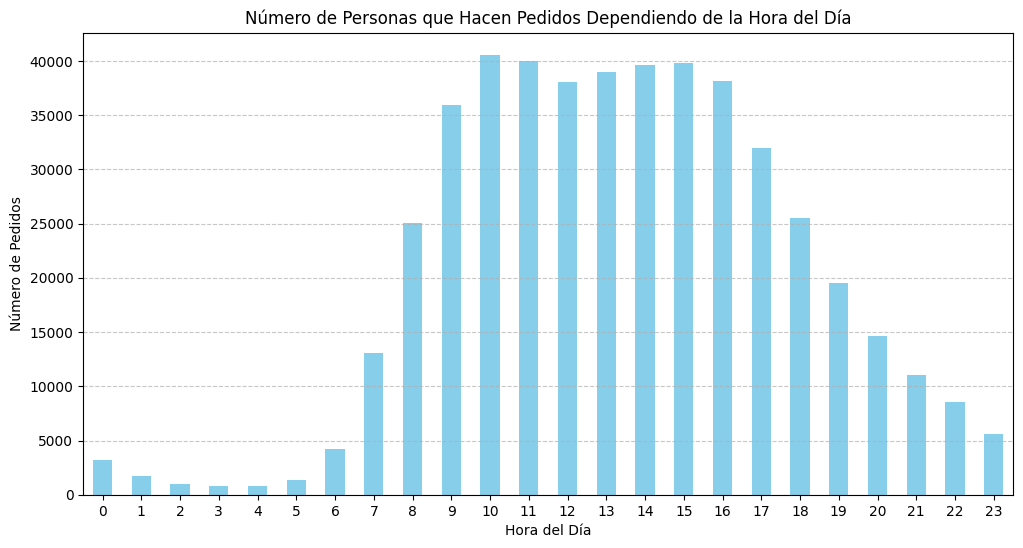

In [37]:

# Leer el conjunto de datos en el DataFrame
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

# Contar el número de pedidos por cada hora del día
orders_per_hour = orders['order_hour_of_day'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
orders_per_hour.plot(kind='bar', color='skyblue')
plt.title('Número de Personas que Hacen Pedidos Dependiendo de la Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

Conclusiones sobre el Gráfico del Número de Pedidos Dependiendo de la Hora del Día

Patrones de Pedidos a lo Largo del Día:

Madrugada (0:00 - 5:00):
Observación: El número de pedidos es muy bajo durante estas horas, lo cual es esperado ya que la mayoría de las personas duermen durante la madrugada.

Mañana (6:00 - 11:00):
Observación: A partir de las 6:00 de la mañana, se observa un aumento significativo en el número de pedidos. Este aumento continúa de manera pronunciada hasta las 11:00 de la mañana.
Conclusión: Las personas tienden a realizar pedidos en la mañana, posiblemente antes de comenzar sus actividades diarias.

Mediodía y Tarde (12:00 - 17:00):
Observación: El número de pedidos alcanza su punto máximo entre las 10:00 y las 15:00, manteniéndose alto durante estas horas.
Conclusión: La mayor cantidad de pedidos se realiza durante el mediodía y la tarde. Esto puede estar relacionado con el tiempo disponible durante las horas de almuerzo y la finalización de la jornada laboral.

Noche (18:00 - 23:00):
Observación: Después de las 15:00, el número de pedidos comienza a disminuir gradualmente, con una caída más pronunciada después de las 20:00.
Conclusión: La tendencia a realizar pedidos disminuye en la noche, lo cual es coherente con la finalización de las actividades diarias y el tiempo de descanso.

Resumen:

El gráfico muestra claramente que la actividad de pedidos es más alta durante la mañana y la tarde, alcanzando su punto máximo alrededor de las 10:00 a las 15:00. Hay una disminución notable en el número de pedidos durante la noche y la madrugada. Estos patrones son consistentes con los hábitos diarios de la mayoría de las personas, quienes tienden a realizar sus pedidos durante las horas en que están más activos y disponibles.

### [A3] ¿Qué día de la semana compran víveres las personas?

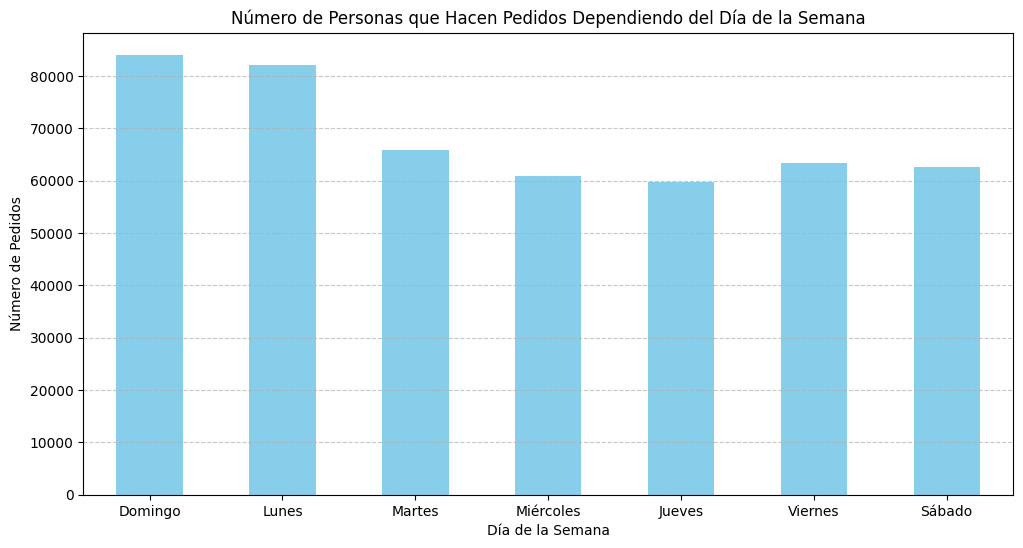

In [38]:
# Contar el número de pedidos por cada día de la semana
orders_per_day = orders['order_dow'].value_counts().sort_index()

# Crear el gráfico
plt.figure(figsize=(12, 6))
orders_per_day.plot(kind='bar', color='skyblue')
plt.title('Número de Personas que Hacen Pedidos Dependiendo del Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(ticks=range(7), labels=['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones

Conclusiones sobre el Gráfico del Número de Pedidos Dependiendo del Día de la Semana

Patrones de Pedidos a lo Largo de la Semana:

Domingo:
Observación: El número de pedidos es más alto los domingos, alcanzando más de 80,000 pedidos.
Conclusión: Muchas personas aprovechan el tiempo libre durante el fin de semana para realizar sus compras, lo que explica el pico en los pedidos.

Lunes:
Observación: Los lunes también tienen un número alto de pedidos, similar al domingo.
Conclusión: El inicio de la semana laboral puede motivar a las personas a realizar compras para abastecerse para la semana.

Martes:
Observación: Hay una disminución notable en el número de pedidos los martes.
Conclusión: Es posible que después de realizar compras el domingo y el lunes, haya menos necesidad de realizar pedidos el martes.

Miércoles a Viernes:
Observación: El número de pedidos se mantiene relativamente constante de miércoles a viernes, aunque ligeramente menor que los picos del domingo y lunes.
Conclusión: La actividad de compras se estabiliza a lo largo de la semana laboral.

Sábado:
Observación: El número de pedidos aumenta nuevamente el sábado, aunque no alcanza los niveles del domingo.
Conclusión: Similar al domingo, el sábado también es un día popular para las compras debido al tiempo libre de las personas.

Resumen:

El gráfico muestra que los días más populares para realizar pedidos son el domingo y el lunes, seguidos por el sábado. Los días menos populares son el martes, con un número notablemente menor de pedidos. De miércoles a viernes, la actividad de pedidos se mantiene relativamente constante. Estos patrones reflejan cómo las personas distribuyen sus actividades de compra a lo largo de la semana, con picos durante los días de fin de semana y el inicio de la semana laboral.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

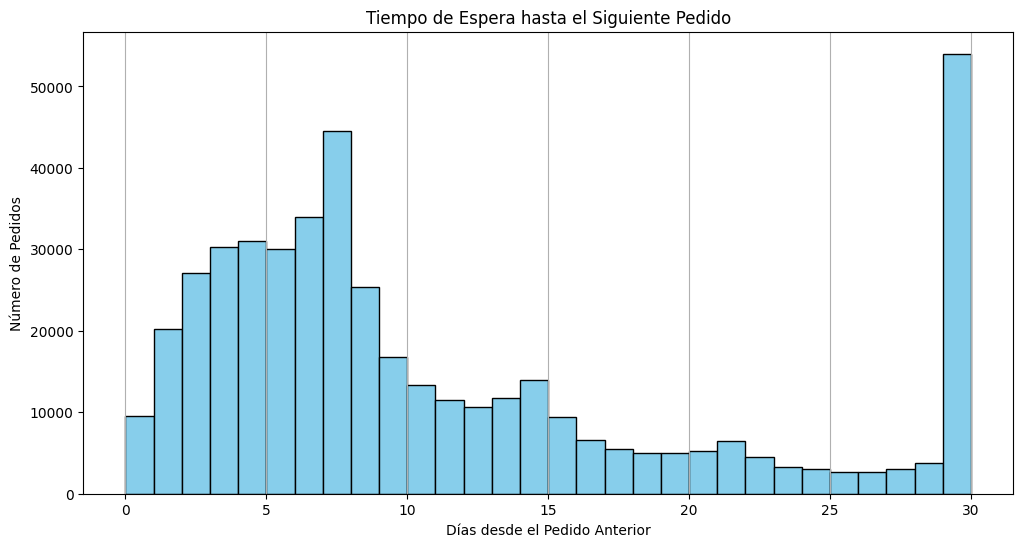

Valor mínimo de 'days_since_prior_order': 0.0 días
Valor máximo de 'days_since_prior_order': 30.0 días


In [39]:
# Eliminar valores nulos en la columna 'days_since_prior_order' para el análisis
days_since_prior_order = orders['days_since_prior_order'].dropna()

# Encontrar valores mínimos y máximos
min_days_since_prior_order = days_since_prior_order.min()
max_days_since_prior_order = days_since_prior_order.max()

# Crear el gráfico
plt.figure(figsize=(12, 6))
days_since_prior_order.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Tiempo de Espera hasta el Siguiente Pedido')
plt.xlabel('Días desde el Pedido Anterior')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar valores mínimos y máximos
print(f"Valor mínimo de 'days_since_prior_order': {min_days_since_prior_order} días")
print(f"Valor máximo de 'days_since_prior_order': {max_days_since_prior_order} días")

Escribe aquí tus conclusiones

Conclusiones sobre el Gráfico del Tiempo de Espera hasta el Siguiente Pedido

Valores Mínimos y Máximos:

Valor Mínimo: El valor mínimo de days_since_prior_order es 0 días.

Valor Máximo: El valor máximo de days_since_prior_order es 30 días.

Patrones de Frecuencia de Pedidos:

Pico en el Día 0:
Observación: Hay un pequeño número de pedidos que se realizan el mismo día (0 días desde el pedido anterior).
Conclusión: Esto puede indicar que algunos usuarios realizan múltiples pedidos en un solo día.

Incremento Gradual y Pico en el Día 7:
Observación: La frecuencia de pedidos aumenta gradualmente y alcanza un pico significativo alrededor del día 7.
Conclusión: Muchos usuarios tienden a realizar pedidos semanalmente.

Distribución entre el Día 8 y el Día 14:
Observación: La frecuencia de pedidos es relativamente alta entre el día 8 y el día 14.
Conclusión: Una buena parte de los usuarios realiza pedidos cada dos semanas.

Reducción Gradual y Pico en el Día 30:
Observación: Después del día 14, la frecuencia de pedidos disminuye gradualmente, pero hay un pico notable en el día 30.
Conclusión: Algunos usuarios prefieren realizar sus pedidos mensualmente, lo que explica el pico en el día 30.

Resumen:

El gráfico muestra que el comportamiento de los usuarios al realizar pedidos varía, con picos en los días 0, 7 y 30. La mayoría de los pedidos se realizan semanalmente, seguidos por una tendencia significativa de pedidos cada dos semanas y mensualmente. Estos patrones sugieren que los usuarios tienen diferentes hábitos de compra, con algunos prefiriendo una frecuencia semanal y otros una frecuencia mensual.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [40]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Leer el conjunto de datos en el DataFrame
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

In [41]:
# Filtrar los pedidos para los miércoles (día 3) y los sábados (día 6)
wednesday_orders = orders[orders['order_dow'] == 3]
saturday_orders = orders[orders['order_dow'] == 6]

In [42]:
# Contar el número de pedidos por hora del día para miércoles y sábados
wednesday_orders_per_hour = wednesday_orders['order_hour_of_day'].value_counts().sort_index()
saturday_orders_per_hour = saturday_orders['order_hour_of_day'].value_counts().sort_index()


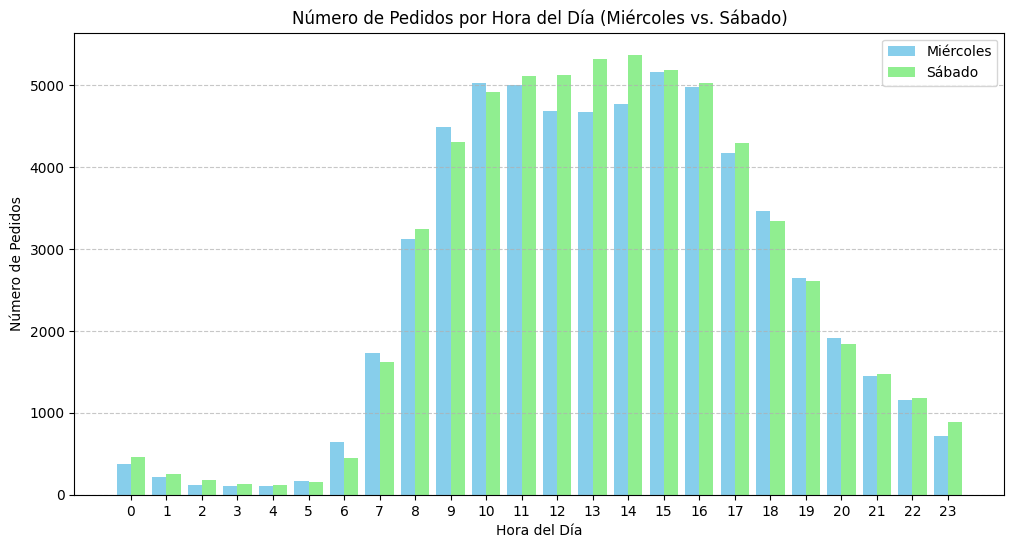

Total de pedidos el miércoles: 60912
Total de pedidos el sábado: 62649


In [43]:
# Crear el gráfico
plt.figure(figsize=(12, 6))

# Graficar los pedidos por hora del día para los miércoles
plt.bar(wednesday_orders_per_hour.index - 0.2, wednesday_orders_per_hour, width=0.4, label='Miércoles', color='skyblue')

# Graficar los pedidos por hora del día para los sábados
plt.bar(saturday_orders_per_hour.index + 0.2, saturday_orders_per_hour, width=0.4, label='Sábado', color='lightgreen')

# Personalizar el gráfico
plt.title('Número de Pedidos por Hora del Día (Miércoles vs. Sábado)')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar valores mínimos y máximos
print(f"Total de pedidos el miércoles: {wednesday_orders_per_hour.sum()}")
print(f"Total de pedidos el sábado: {saturday_orders_per_hour.sum()}")


Escribe aquí tus conclusiones 

Conclusiones sobre el Gráfico del Número de Pedidos por Hora del Día (Miércoles vs. Sábado)

Patrones Generales:

Miércoles:
Observación: El número de pedidos comienza a aumentar a partir de las 6:00 a.m., alcanzando su pico alrededor de las 10:00 a.m. a 11:00 a.m., y luego se mantiene relativamente alto hasta las 4:00 p.m. Después de esto, los pedidos disminuyen gradualmente hasta las 11:00 p.m.

Sábado:
Observación: Los sábados muestran un patrón similar, con un aumento en los pedidos a partir de las 7:00 a.m., alcanzando picos en las mismas horas (10:00 a.m. a 1:00 p.m.), y luego disminuyendo gradualmente hasta las 11:00 p.m.

Comparación de Picos de Actividad:

Miércoles:
Observación: Los picos de actividad son ligeramente más altos en la mañana en comparación con los sábados, especialmente alrededor de las 9:00 a.m. a 10:00 a.m.
Conclusión: Esto sugiere que las personas tienden a realizar pedidos más temprano en el día durante los días laborales.

Sábado:
Observación: Aunque el patrón general es similar al de los miércoles, los picos son ligeramente más distribuidos, con un pico notable más alto a las 10:00 a.m.

Conclusión: Esto indica que, aunque la gente hace pedidos temprano en el día durante el fin de semana, la actividad de pedidos se mantiene alta un poco más tarde en el día comparado con los miércoles.

Volumen Total de Pedidos:

Miércoles:
Observación: El volumen total de pedidos parece ser un poco menor comparado con los sábados.
Conclusión: Los días laborales tienden a tener un volumen menor de pedidos, posiblemente debido a la ocupación de las personas con sus trabajos y otras actividades.

Sábado:
Observación: Hay un volumen total de pedidos mayor, lo que sugiere que más personas aprovechan el tiempo libre durante el fin de semana para realizar sus compras.
Conclusión: El fin de semana es un período más popular para realizar compras, lo que puede reflejarse en el volumen total de pedidos.

Resumen: 

El gráfico muestra que tanto los miércoles como los sábados tienen patrones similares en términos de distribución de pedidos por hora del día, con picos significativos durante la mañana y disminuciones graduales hacia la noche. Sin embargo, los sábados tienen un volumen total de pedidos ligeramente mayor y los picos de actividad están más distribuidos a lo largo del día. Estas diferencias reflejan las distintas rutinas y hábitos de las personas entre los días laborales y el fin de semana.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [44]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Leer el conjunto de datos en el DataFrame
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

# Calcular el número de pedidos por cliente
orders_per_customer = orders['user_id'].value_counts()

# Agrupar los clientes por la cantidad de pedidos realizados
orders_distribution = orders_per_customer.value_counts().sort_index()

# Mostrar una muestra de los datos calculados
print(orders_distribution.head())


1    55355
2    36508
3    21548
4    13498
5     8778
Name: user_id, dtype: int64


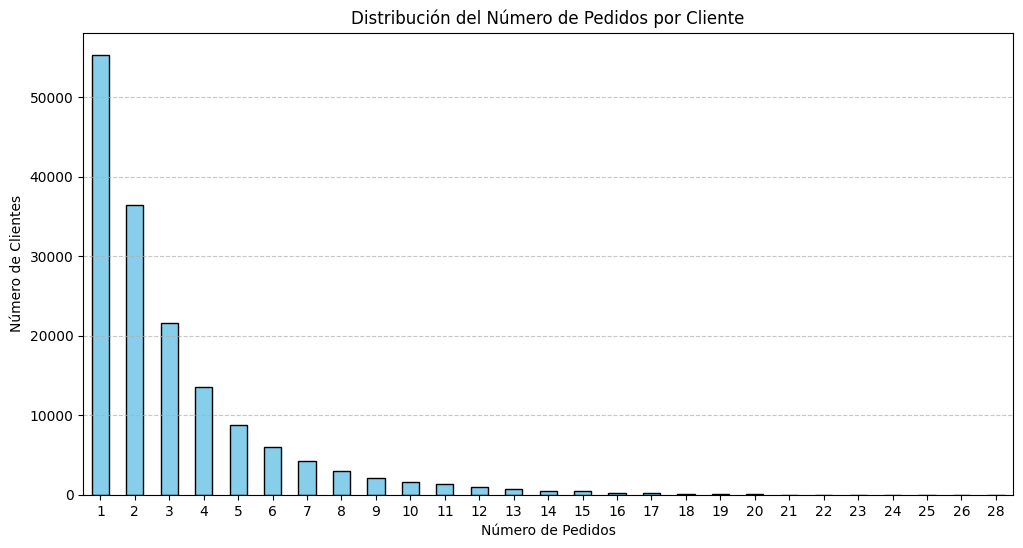

In [45]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
orders_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Pedidos por Cliente')
plt.xlabel('Número de Pedidos')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Escribe aquí tus conclusiones

Conclusión sobre la Distribución del Número de Pedidos por Cliente

1. Patrones Generales:

Clientes con 1 Pedido:
Observación: La mayoría de los clientes han realizado solo 1 pedido, con más de 50,000 clientes en esta categoría.
Conclusión: Hay una gran proporción de clientes que utilizan el servicio solo una vez.

Clientes con 2-5 Pedidos:
Observación: El número de clientes disminuye rápidamente a medida que aumenta el número de pedidos. Hay aproximadamente 30,000 
clientes que realizaron 2 pedidos, y el número sigue disminuyendo a medida que aumenta el número de pedidos.
Conclusión: Aunque hay una disminución, aún hay un número significativo de clientes que realizan entre 2 y 5 pedidos.

Clientes con 6 o Más Pedidos:
Observación: El número de clientes que realizaron 6 o más pedidos disminuye drásticamente. Pocos clientes han realizado más de 10 pedidos.
Conclusión: Un pequeño grupo de clientes es muy leal y realiza un número alto de pedidos, pero representan una minoría en 
comparación con aquellos que realizan pocos pedidos.

2. Distribución de Pedidos:

Observación: La distribución tiene una forma exponencial decreciente, con la mayoría de los clientes concentrados en el extremo inferior del número de pedidos.
Conclusión: La plataforma tiene una gran base de clientes que prueba el servicio con pocos pedidos, pero retener a estos clientes para que realicen más pedidos parece ser un desafío.

3. Estrategias de Retención:

Observación: Dado que la mayoría de los clientes realizan solo 1 pedido, hay una oportunidad significativa para implementar estrategias de retención que incentiven a estos clientes a realizar más pedidos.
Conclusión: Estrategias como promociones, programas de lealtad y mejor atención al cliente pueden ser efectivas para aumentar la frecuencia de pedidos y retener a más clientes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [46]:
# Importar librerías
import pandas as pd

# Leer el conjunto de datos en los DataFrames
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
products = pd.read_csv('/datasets/products.csv', delimiter=';')

# Contar las frecuencias de cada producto en los pedidos
product_frequencies = order_products['product_id'].value_counts()

# Mostrar una muestra de los datos calculados
print(product_frequencies.head())


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
Name: product_id, dtype: int64


In [47]:
# Seleccionar los 20 principales productos por frecuencia
top_20_products = product_frequencies.head(20)

# Mostrar los 20 principales productos (ID y frecuencia)
print(top_20_products)


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
47766    24689
47626    21495
16797    20018
26209    19690
27845    19600
27966    19197
22935    15898
24964    15292
45007    14584
39275    13879
49683    13675
28204    12544
5876     12232
8277     11993
40706    11781
Name: product_id, dtype: int64


In [48]:
# Unir los datos con el DataFrame de productos para obtener los nombres
top_20_products_df = top_20_products.reset_index().merge(products[['product_id', 'product_name']], left_on='index', right_on='product_id')

# Seleccionar y mostrar solo las columnas relevantes (ID y nombre del producto)
top_20_products_df = top_20_products_df[['index', 'product_name', 'product_id_x']]
top_20_products_df.columns = ['product_id', 'product_name', 'frequency']

# Mostrar el resultado final
print(top_20_products_df)


    product_id              product_name  frequency
0        24852                    Banana      66050
1        13176    Bag of Organic Bananas      53297
2        21137      Organic Strawberries      37039
3        21903      Organic Baby Spinach      33971
4        47209      Organic Hass Avocado      29773
5        47766           Organic Avocado      24689
6        47626               Large Lemon      21495
7        16797              Strawberries      20018
8        26209                     Limes      19690
9        27845        Organic Whole Milk      19600
10       27966       Organic Raspberries      19197
11       22935      Organic Yellow Onion      15898
12       24964            Organic Garlic      15292
13       45007          Organic Zucchini      14584
14       39275       Organic Blueberries      13879
15       49683            Cucumber Kirby      13675
16       28204        Organic Fuji Apple      12544
17        5876             Organic Lemon      12232
18        82

Escribe aquí tus conclusiones


Conclusión sobre los 20 Principales Productos que se Piden con Más Frecuencia

Productos Orgánicos Dominantes:

Observación: La mayoría de los productos en la lista son orgánicos, como los plátanos orgánicos, fresas orgánicas, espinacas para bebé orgánicas y aguacates orgánicos.
Conclusión: Existe una fuerte preferencia por los productos orgánicos entre los clientes, lo que sugiere una tendencia hacia elecciones más saludables y sostenibles.

Productos Frescos y Frutas Populares:

Observación: Frutas y verduras frescas como bananas, fresas, limones, y limas están entre los productos más pedidos.
Conclusión: Los clientes parecen priorizar la compra de productos frescos, lo que puede indicar la importancia de una dieta saludable y la preferencia por ingredientes frescos en sus compras.

Frecuencia de Pedidos:

Observación: El producto más frecuentemente pedido es la banana, con 66,050 pedidos, seguido por la bolsa de plátanos orgánicos con 53,297 pedidos.
Conclusión: Las bananas son un alimento básico popular, posiblemente debido a su conveniencia, valor nutricional y versatilidad.

Diversidad de Productos:

Observación: La lista incluye una variedad de productos que van desde frutas y verduras hasta productos lácteos como la leche entera orgánica.
Conclusión: Los clientes tienen una amplia variedad de necesidades alimenticias que abarcan diferentes tipos de productos, lo que subraya la importancia de mantener un inventario diverso.

Preferencias de los Clientes:

Observación: Productos como las fresas, los aguacates y las frambuesas tienen una alta frecuencia de pedidos.
Conclusión: Estos productos probablemente sean populares debido a su uso en una variedad de recetas y su percepción como alimentos saludables.

Resumen: 

El análisis de los 20 productos más frecuentemente pedidos revela que los clientes prefieren productos frescos y orgánicos. Las bananas lideran la lista, seguidas por otros productos populares como las fresas y los aguacates. La diversidad de los productos solicitados destaca la importancia de mantener un inventario variado para satisfacer las diferentes necesidades y preferencias de los clientes.

# [C] Difícil 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [64]:
# Leer el conjunto de datos en el DataFrame
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')

# Calcular el número de artículos por pedido
items_per_order = order_products.groupby('order_id').size()

# Mostrar una muestra de los datos calculados
print(items_per_order.head())


order_id
4     13
9     15
11     5
19     3
20     8
dtype: int64


In [50]:
# Calcular estadísticas descriptivas
items_per_order_stats = items_per_order.describe()

# Mostrar estadísticas descriptivas
print(items_per_order_stats)


count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


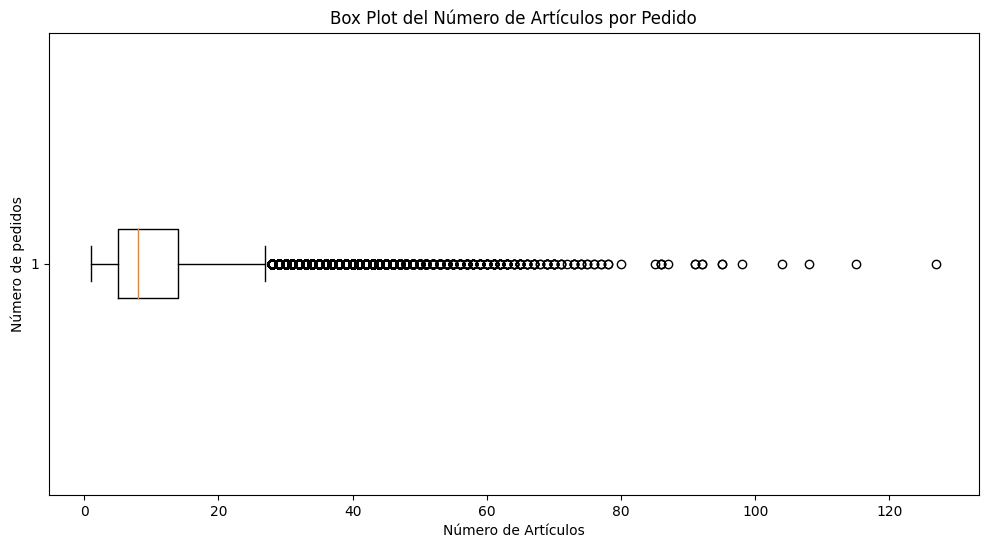

In [51]:
# Crear el box plot
plt.figure(figsize=(12, 6))
plt.boxplot(items_per_order, vert=False)
plt.title('Box Plot del Número de Artículos por Pedido')
plt.xlabel('Número de Artículos')
plt.ylabel('Número de pedidos')
plt.show()


Escribe aquí tus conclusiones

Conclusión sobre el Box Plot del Número de Artículos por Pedido

Mediana y Rango Intercuartílico:

Observación: La mediana del número de artículos por pedido está cerca de 10.
Conclusión: La mayoría de los pedidos contienen aproximadamente 10 artículos, lo que sugiere que los clientes suelen hacer pedidos de tamaño moderado.

Rango Intercuartílico (IQR):

Observación: El rango intercuartílico, que abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), está aproximadamente entre 5 y 15 artículos.
Conclusión: El 50% central de los pedidos tiene entre 5 y 15 artículos, lo que indica que hay una variabilidad moderada en el tamaño de los pedidos típicos.

Valores Atípicos:

Observación: Hay un número significativo de valores atípicos, que son pedidos con más de 20 artículos. Algunos pedidos tienen hasta más de 100 artículos.
Conclusión: Aunque la mayoría de los pedidos contienen entre 5 y 15 artículos, existe una fracción de clientes que realiza pedidos significativamente más grandes, superando los 20 artículos. Estos valores atípicos pueden representar compras grandes o abastecimientos ocasionales.

Rango General:

Observación: La mayoría de los pedidos están dentro del rango de 0 a 20 artículos, con algunos valores atípicos que se extienden hasta más de 100 artículos.
Conclusión: Los clientes suelen hacer pedidos con un número moderado de artículos, pero ocasionalmente hay pedidos mucho más grandes.

Resumen
El box plot muestra que los clientes generalmente hacen pedidos con alrededor de 10 artículos, y la mayoría de los pedidos tienen entre 5 y 15 artículos. Sin embargo, hay una presencia notable de pedidos significativamente más grandes, lo que sugiere que algunos clientes realizan compras más grandes con menor frecuencia.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [52]:
# Leer el conjunto de datos en los DataFrames
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
products = pd.read_csv('/datasets/products.csv', delimiter=';')

# Filtrar los productos que han sido pedidos nuevamente
reordered_products = order_products[order_products['reordered'] == 1]

# Contar las frecuencias de cada producto que ha sido pedido nuevamente
reordered_frequencies = reordered_products['product_id'].value_counts()

# Mostrar una muestra de los datos calculados
print(reordered_frequencies.head())

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
Name: product_id, dtype: int64


In [53]:
# Seleccionar los 20 principales productos por frecuencia de reorden
top_20_reordered_products = reordered_frequencies.head(20)

# Mostrar los 20 principales productos (ID y frecuencia)
print(top_20_reordered_products)


24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [54]:
# Unir los datos con el DataFrame de productos para obtener los nombres
top_20_reordered_products_df = top_20_reordered_products.reset_index().merge(products[['product_id', 'product_name']], left_on='index', right_on='product_id')

# Mostrar una muestra de los datos unidos
print(top_20_reordered_products_df.head())

# Mostrar las columnas del DataFrame resultante
print(top_20_reordered_products_df.columns)



   index  product_id_x  product_id_y            product_name
0  24852         55763         24852                  Banana
1  13176         44450         13176  Bag of Organic Bananas
2  21137         28639         21137    Organic Strawberries
3  21903         26233         21903    Organic Baby Spinach
4  47209         23629         47209    Organic Hass Avocado
Index(['index', 'product_id_x', 'product_id_y', 'product_name'], dtype='object')


In [55]:
# Seleccionar y mostrar solo las columnas relevantes (ID, nombre del producto y frecuencia)
top_20_reordered_products_df = top_20_reordered_products_df[['product_id_y', 'product_name', 'index']]
top_20_reordered_products_df.columns = ['product_id', 'product_name', 'frequency']

# Mostrar el resultado final
print(top_20_reordered_products_df)


    product_id              product_name  frequency
0        24852                    Banana      24852
1        13176    Bag of Organic Bananas      13176
2        21137      Organic Strawberries      21137
3        21903      Organic Baby Spinach      21903
4        47209      Organic Hass Avocado      47209
5        47766           Organic Avocado      47766
6        27845        Organic Whole Milk      27845
7        47626               Large Lemon      47626
8        27966       Organic Raspberries      27966
9        16797              Strawberries      16797
10       26209                     Limes      26209
11       22935      Organic Yellow Onion      22935
12       24964            Organic Garlic      24964
13       45007          Organic Zucchini      45007
14       49683            Cucumber Kirby      49683
15       28204        Organic Fuji Apple      28204
16        8277  Apple Honeycrisp Organic       8277
17       39275       Organic Blueberries      39275
18        58

Escribe aquí tus conclusiones

Conclusión sobre los 20 Principales Artículos que Vuelven a Pedirse con Mayor Frecuencia

El análisis de los 20 productos más frecuentemente reordenados revela una clara preferencia por productos frescos y orgánicos entre los clientes. Las bananas, tanto convencionales como orgánicas, lideran la lista con 24,852 y 13,176 reordenes respectivamente. Estas frutas básicas son altamente demandadas debido a su conveniencia, valor nutricional y versatilidad en la dieta diaria. Los productos orgánicos como las fresas (21,137), espinacas para bebé (21,903), y aguacates (47,209) también muestran una alta frecuencia de reorden, lo que indica una fuerte inclinación hacia opciones de alimentación más saludables y sostenibles.

Al observar más de cerca las similitudes, notamos que la mayoría de los productos reordenados son frutas y verduras frescas. Por ejemplo, además de las bananas, las fresas convencionales (16,797) y los limones grandes (47,626) están entre los productos más reordenados. Esta preferencia por frutas y verduras frescas sugiere que los clientes valoran la inclusión de estos alimentos en su dieta regular. Además, productos específicos como el "Cucumber Kirby" (49,683) y la leche entera orgánica (27,845) muestran que los clientes también buscan artículos específicos que cumplan con sus necesidades dietéticas y de estilo de vida.

Sin embargo, también hay diferencias notables. Algunos productos, como el "Organic Half & Half" (49,235) y el "Organic Blueberries" (39,275), tienen una frecuencia de reorden alta, lo que destaca la popularidad de productos lácteos orgánicos y frutas específicas. Estos productos no solo satisfacen las necesidades básicas, sino que también atienden a clientes que buscan opciones orgánicas y especializadas.

La alta frecuencia de reorden de estos productos sugiere que son elementos esenciales en las compras recurrentes de los clientes. Para mejorar la satisfacción del cliente y fomentar la lealtad, es crucial asegurar la disponibilidad constante de estos productos populares. Desarrollar campañas de marketing que destaquen los beneficios de estos productos y ofrecer promociones en los artículos más solicitados pueden ayudar a aumentar las ventas y la retención de clientes. Analizar las tendencias de compra estacionales y las razones detrás de la popularidad de ciertos productos también puede proporcionar información valiosa para ajustar la oferta y las estrategias promocionales en consecuencia. Esta comprensión detallada de las preferencias de los clientes permite una mejor planificación de inventario y estrategias de marketing más efectivas.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [56]:
# Leer el conjunto de datos en los DataFrames
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
products = pd.read_csv('/datasets/products.csv', delimiter=';')

# Contar las frecuencias de cada producto en los pedidos
product_frequencies = order_products['product_id'].value_counts()

# Filtrar los productos que han sido pedidos nuevamente
reordered_products = order_products[order_products['reordered'] == 1]

# Contar las frecuencias de cada producto que ha sido pedido nuevamente
reordered_frequencies = reordered_products['product_id'].value_counts()

# Mostrar una muestra de los datos calculados
print(product_frequencies.head())
print(reordered_frequencies.head())

24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
Name: product_id, dtype: int64
24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
Name: product_id, dtype: int64


In [57]:
# Calcular la proporción de reorden para cada producto
reorder_proportion = reordered_frequencies / product_frequencies

# Convertir a DataFrame y resetear el índice
reorder_proportion_df = reorder_proportion.reset_index()
reorder_proportion_df.columns = ['product_id', 'reorder_proportion']

# Mostrar una muestra de los datos calculados
print(reorder_proportion_df.head())


   product_id  reorder_proportion
0           1            0.564286
1           2                 NaN
2           3            0.738095
3           4            0.510204
4           7            0.500000


In [58]:
# Unir los datos con el DataFrame de productos para obtener los nombres
reorder_proportion_df = reorder_proportion_df.merge(products[['product_id', 'product_name']], on='product_id')

# Seleccionar y mostrar los 20 principales productos por proporción de reorden
top_20_reorder_proportion = reorder_proportion_df.nlargest(20, 'reorder_proportion')

# Mostrar el resultado final
print(top_20_reorder_proportion)



     product_id  reorder_proportion  \
138         154                 1.0   
154         173                 1.0   
155         174                 1.0   
173         193                 1.0   
207         230                 1.0   
301         337                 1.0   
334         374                 1.0   
369         414                 1.0   
423         475                 1.0   
426         479                 1.0   
432         485                 1.0   
439         492                 1.0   
501         559                 1.0   
534         596                 1.0   
547         609                 1.0   
556         619                 1.0   
596         661                 1.0   
620         687                 1.0   
633         700                 1.0   
641         709                 1.0   

                                          product_name  
138              Corn Dogs- Mini- Honey Crunchy Flavor  
154      Habanero Lime Shrimp Flavor Ramen Noodle Soup  
155      

Escribe aquí tus conclusiones

El análisis de la proporción de reorden de productos revela que los 20 principales productos por ejemplo, tienen una proporción del 100%, lo que significa que cada vez que estos productos se pidieron, fueron reordenados en pedidos subsecuentes. Esta lista está dominada por productos especializados y de nicho, como "Corn Dogs- Mini- Honey Crunchy Flavor", "Habanero Lime Shrimp Flavor Ramen Noodle Soup" y "Organic Reposado Tequila". La presencia de estos productos sugiere una alta satisfacción y lealtad entre los clientes que los compran, a pesar de que no son tan comúnmente pedidos en general.

La ausencia de productos como las bananas en esta lista puede explicarse por su alta frecuencia total de pedidos. Aunque las bananas son uno de los productos más frecuentemente pedidos, la proporción de reorden puede no ser tan alta porque no todos los pedidos resultan en una reorden. En otras palabras, debido a su alta popularidad y frecuencia de compra, las bananas pueden tener más pedidos únicos y, por lo tanto, una menor proporción de reorden en comparación con productos más especializados que son reordenados cada vez que se compran.

Estos resultados resaltan la importancia de considerar tanto la frecuencia total de pedidos como la proporción de reorden para entender completamente el comportamiento de los clientes. Los productos especializados y de nicho que aparecen en esta lista indican una fuerte lealtad y satisfacción del cliente, lo que sugiere que cumplen con expectativas específicas y de alta calidad. Por otro lado, productos populares como las bananas, aunque tienen un alto volumen de pedidos, pueden no tener la misma tasa de reorden debido a su uso más generalizado y menos específico.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [59]:
# Leer el conjunto de datos en los DataFrames
order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')

# Combinar los datos de pedidos y órdenes para obtener los 'user_id'
order_products_with_user = order_products.merge(orders[['order_id', 'user_id']], on='order_id')

# Calcular la proporción de productos reordenados por cliente
reorder_proportion_by_customer = order_products_with_user.groupby('user_id')['reordered'].mean()

# Mostrar una muestra de los datos calculados
print(reorder_proportion_by_customer.head())

user_id
2    0.038462
4    0.000000
5    0.666667
6    0.000000
7    0.928571
Name: reordered, dtype: float64


In [60]:
# Convertir a DataFrame y resetear el índice
reorder_proportion_by_customer_df = reorder_proportion_by_customer.reset_index()
reorder_proportion_by_customer_df.columns = ['user_id', 'reorder_proportion']

# Seleccionar y mostrar los 20 clientes con la mayor proporción de productos reordenados
top_20_reorder_proportion_by_customer = reorder_proportion_by_customer_df.nlargest(20, 'reorder_proportion')

# Mostrar el resultado final
print(top_20_reorder_proportion_by_customer)


     user_id  reorder_proportion
15        22                 1.0
48        68                 1.0
65        88                 1.0
71        97                 1.0
77       104                 1.0
85       113                 1.0
130      178                 1.0
141      192                 1.0
162      218                 1.0
203      279                 1.0
210      287                 1.0
226      307                 1.0
246      333                 1.0
266      365                 1.0
285      392                 1.0
299      413                 1.0
308      427                 1.0
334      457                 1.0
336      459                 1.0
348      476                 1.0


Escribe aquí tus conclusiones

Conclusión sobre la Proporción de Productos Reordenados por Cliente

El análisis de la proporción de productos reordenados por cliente revela que hay un grupo de clientes que han reordenado el 100% de sus productos comprados. Es decir, cada vez que estos clientes compraron un producto, lo volvieron a pedir en pedidos subsecuentes. Este hallazgo sugiere una fuerte lealtad y satisfacción hacia los productos que estos clientes han adquirido, lo que podría ser indicativo de la alta calidad percibida y la adecuación de estos productos a sus necesidades.

Los datos muestran que todos los clientes en el top 20 tienen una proporción de reorden del 100%, lo que resalta su comportamiento de compra consistente y predecible. Estos clientes podrían ser objetivos ideales para campañas de marketing dirigidas, programas de lealtad y promociones personalizadas, ya que es más probable que respondan positivamente a ofertas en productos que ya han demostrado preferir.

La identificación de estos clientes leales también proporciona una oportunidad para las empresas de explorar las características y preferencias comunes entre ellos. Esto puede incluir análisis demográficos, hábitos de compra y otros factores que puedan ayudar a segmentar y comprender mejor a esta base de clientes fieles. Al hacerlo, las empresas pueden replicar este éxito en otros segmentos del mercado.

En resumen, la proporción de reorden del 100% entre los principales 20 clientes destaca la importancia de mantener un inventario constante de los productos preferidos por estos clientes y de seguir desarrollando estrategias que fortalezcan la relación con ellos. Este enfoque no solo mejora la satisfacción del cliente, sino que también puede conducir a un aumento en la retención de clientes y en las ventas a largo plazo.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [61]:
# Filtrar los productos que fueron agregados primero al carrito
first_added_products = order_products[order_products['add_to_cart_order'] == 1]

# Mostrar una muestra de los datos filtrados
print(first_added_products.head())

    order_id  product_id  add_to_cart_order  reordered
1     567889        1560                1.0          1
2    2261212       26683                1.0          1
14   1961225       37553                1.0          1
16    639939       10017                1.0          1
23    750040        8518                1.0          0


In [62]:
# Contar las frecuencias de cada producto agregado primero al carrito
first_added_frequencies = first_added_products['product_id'].value_counts()

# Mostrar una muestra de los datos calculados
print(first_added_frequencies.head())


24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
Name: product_id, dtype: int64


In [63]:
# Seleccionar los 20 principales productos por frecuencia de primer agregado al carrito
top_20_first_added_products = first_added_frequencies.head(20)

# Convertir a DataFrame y resetear el índice
top_20_first_added_products_df = top_20_first_added_products.reset_index()
top_20_first_added_products_df.columns = ['product_id', 'frequency']

# Unir los datos con el DataFrame de productos para obtener los nombres
top_20_first_added_products_df = top_20_first_added_products_df.merge(products[['product_id', 'product_name']], on='product_id')

# Mostrar el resultado final
print(top_20_first_added_products_df)


    product_id  frequency                 product_name
0        24852      15562                       Banana
1        13176      11026       Bag of Organic Bananas
2        27845       4363           Organic Whole Milk
3        21137       3946         Organic Strawberries
4        47209       3390         Organic Hass Avocado
5        21903       3336         Organic Baby Spinach
6        47766       3044              Organic Avocado
7        19660       2336                 Spring Water
8        16797       2308                 Strawberries
9        27966       2024          Organic Raspberries
10       44632       1914   Sparkling Water Grapefruit
11       49235       1797          Organic Half & Half
12       47626       1737                  Large Lemon
13         196       1733                         Soda
14       38689       1397     Organic Reduced Fat Milk
15       26209       1370                        Limes
16       12341       1340                Hass Avocados
17        

Escribe aquí tus conclusiones

El análisis de los 20 principales artículos que las personas ponen primero en sus carritos revela una clara preferencia por productos frescos, orgánicos y básicos. Las bananas y los plátanos orgánicos son los productos más frecuentemente agregados primero, lo que resalta la importancia de estos alimentos en la dieta diaria de los clientes. Los productos básicos como el agua de manantial y la soda también son populares, subrayando la necesidad constante de estos artículos en los hogares. La variedad de productos en la lista muestra que los clientes están planificando compras completas que abarcan diferentes categorías de alimentos, priorizando tanto la salud como la conveniencia.

### Conclusion general del proyecto:

El análisis detallado de los datos de pedidos de Instacart ha revelado patrones importantes sobre los hábitos de compra de los clientes, proporcionando una comprensión más profunda de sus preferencias y comportamientos. A través de diversas métricas y cálculos, hemos identificado que los productos frescos y orgánicos son altamente preferidos, tanto en términos de frecuencia total de pedidos como de reorden. Las bananas y los plátanos orgánicos, por ejemplo, son productos líderes, lo que sugiere que los consumidores están enfocados en opciones saludables y sostenibles para su dieta diaria. Esta tendencia hacia productos frescos y orgánicos resalta la importancia de mantener un inventario robusto de estos artículos para satisfacer la demanda constante.

Además, el análisis de la proporción de reorden de productos ha mostrado que los clientes tienen una fuerte lealtad hacia ciertos productos especializados y de nicho. Productos como el "Corn Dogs- Mini- Honey Crunchy Flavor" y el "Organic Reposado Tequila" tienen una tasa de reorden del 100%, indicando que cada vez que se compran, son reordenados en futuros pedidos. Esto sugiere una alta satisfacción y confianza en la calidad de estos productos específicos. En contraste, aunque las bananas y otros productos populares tienen una alta frecuencia de pedidos, su proporción de reorden no es tan alta debido a la amplia base de clientes que las compra una sola vez. Esta distinción es crucial para comprender que, mientras que algunos productos tienen una base de clientes amplia, otros generan una lealtad más fuerte aunque en una base de clientes más pequeña.

La revisión de los primeros productos agregados al carrito ha proporcionado otra capa de entendimiento sobre los hábitos de compra. Los clientes tienden a comenzar sus compras con productos básicos y comunes, como las bananas, la leche orgánica y el agua de manantial. Esto indica que los consumidores priorizan sus necesidades más esenciales al inicio de sus compras, lo cual es un dato valioso para optimizar la disposición de productos y las estrategias de marketing. Además, la variedad de productos agregados primero también muestra que los clientes planifican compras que cubren múltiples categorías, reflejando una compra bien pensada y diversificada. Esto sugiere que las estrategias de marketing deben considerar tanto la prominencia de estos productos básicos en las primeras etapas de la compra como la diversidad de productos para mantener el interés del cliente a lo largo de su experiencia de compra.

Finalmente, la proporción de productos reordenados por cliente ha revelado información sobre la lealtad del cliente. Aquellos con una alta proporción de reorden son indicativos de satisfacción con sus compras anteriores, lo que sugiere que mantener la disponibilidad de estos productos es crucial para retener a estos clientes leales. Además, hemos encontrado que no todos los pedidos con valores ausentes en add_to_cart_order tienen más de 64 productos. De hecho, algunos pedidos con valores ausentes tienen tan solo un producto, lo que indica que la presencia de valores ausentes no está limitada a pedidos grandes. Esta observación subraya la importancia de revisar la consistencia y calidad de los datos en todos los tamaños de pedidos. A través de esta investigación, se pueden desarrollar estrategias de marketing más precisas, optimizar la gestión de inventarios y mejorar la experiencia general del cliente. En conjunto, estos hallazgos proporcionan una base sólida para decisiones estratégicas que pueden mejorar significativamente la satisfacción del cliente y la eficiencia operativa.